<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.051152,43.402413,-1737.476912,-1611.023347,1212.483123,-2823.506470
1,0.0,1.0,43.049458,36.891574,796.837187,886.778219,-923.751138,1810.529358
2,0.0,2.0,65.008350,92.773092,11270.145604,11437.927046,1814.184109,9623.742937
3,0.0,3.0,70.975806,81.908903,5491.063194,5653.947904,1959.734667,3694.213237
4,0.0,4.0,48.679083,68.434967,-3155.483764,-3028.369714,173.732102,-3202.101816
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.669043,35.172637,-543.784092,-422.942412,1114.062994,-1537.005406
59996,999.0,56.0,48.724580,94.793393,8804.126564,8957.644538,-2290.455109,11248.099647
59997,999.0,57.0,37.371578,42.682844,-3604.455621,-3514.401199,-18.843044,-3495.558155
59998,999.0,58.0,62.447894,58.886590,1928.344019,2059.678504,-290.583449,2350.261953


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    73.051152  43.402413  -1737.476912  -1611.023347  1212.483123   
      1.0    43.049458  36.891574    796.837187    886.778219  -923.751138   
      2.0    65.008350  92.773092  11270.145604  11437.927046  1814.184109   
      3.0    70.975806  81.908903   5491.063194   5653.947904  1959.734667   
      4.0    48.679083  68.434967  -3155.483764  -3028.369714   173.732102   
...                ...        ...           ...           ...          ...   
999.0 55.0   75.669043  35.172637   -543.784092   -422.942412  1114.062994   
      56.0   48.724580  94.793393   8804.126564   8957.644538 -2290.455109   
      57.0   37.371578  42.682844  -3604.455621  -3514.401199   -18.843044   
      58.0   62.447894  58.886590   1928.344019   2059.678504  -290.583449   
      59.0   26.092817  38.523934    940.307526   1014.924277   -46.779176   

                    e_hat  
rep   index                
0.0   0.0    -2823.506470  
      1.0     1810.529358  
      2.0     9623.742937  
      3.0     3694.213237  
      4.0    -3202.101816  
...                   ...  
999.0 55.0   -1537.005406  
      56.0   11248.099647  
      57.0   -3495.558155  
      58.0    2350.261953  
      59.0    1061.703453  

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    73.051152  43.402413  -1737.476912  -1611.023347  1212.483123   
      1.0    43.049458  36.891574    796.837187    886.778219  -923.751138   
      2.0    65.008350  92.773092  11270.145604  11437.927046  1814.184109   
      3.0    70.975806  81.908903   5491.063194   5653.947904  1959.734667   
      4.0    48.679083  68.434967  -3155.483764  -3028.369714   173.732102   
...                ...        ...           ...           ...          ...   
999.0 55.0   75.669043  35.172637   -543.784092   -422.942412  1114.062994   
      56.0   48.724580  94.793393   8804.126564   8957.644538 -2290.455109   
      57.0   37.371578  42.682844  -3604.455621  -3514.401199   -18.843044   
      58.0   62.447894  58.886590   1928.344019   2059.678504  -290.583449   
      59.0   26.092817  38.523934    940.307526   1014.924277   -46.779176   

                    e_hat  
rep   index                
0.0   0.0    -2823.506470  
      1.0     1810.529358  
      2.0     9623.742937  
      3.0     3694.213237  
      4.0    -3202.101816  
...                   ...  
999.0 55.0   -1537.005406  
      56.0   11248.099647  
      57.0   -3495.558155  
      58.0    2350.261953  
      59.0    1061.703453  

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.051152,43.402413,-1737.476912,-1611.023347,1212.483123,-2823.506470
1,0.0,1.0,43.049458,36.891574,796.837187,886.778219,-923.751138,1810.529358
2,0.0,2.0,65.008350,92.773092,11270.145604,11437.927046,1814.184109,9623.742937
3,0.0,3.0,70.975806,81.908903,5491.063194,5653.947904,1959.734667,3694.213237
4,0.0,4.0,48.679083,68.434967,-3155.483764,-3028.369714,173.732102,-3202.101816
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.669043,35.172637,-543.784092,-422.942412,1114.062994,-1537.005406
59996,999.0,56.0,48.724580,94.793393,8804.126564,8957.644538,-2290.455109,11248.099647
59997,999.0,57.0,37.371578,42.682844,-3604.455621,-3514.401199,-18.843044,-3495.558155
59998,999.0,58.0,62.447894,58.886590,1928.344019,2059.678504,-290.583449,2350.261953


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    73.051152  43.402413  -1737.476912  -1611.023347  1212.483123   
      1.0    43.049458  36.891574    796.837187    886.778219  -923.751138   
      2.0    65.008350  92.773092  11270.145604  11437.927046  1814.184109   
      3.0    70.975806  81.908903   5491.063194   5653.947904  1959.734667   
      4.0    48.679083  68.434967  -3155.483764  -3028.369714   173.732102   
...                ...        ...           ...           ...          ...   
999.0 55.0   75.669043  35.172637   -543.784092   -422.942412  1114.062994   
      56.0   48.724580  94.793393   8804.126564   8957.644538 -2290.455109   
      57.0   37.371578  42.682844  -3604.455621  -3514.401199   -18.843044   
      58.0   62.447894  58.886590   1928.344019   2059.678504  -290.583449   
      59.0   26.092817  38.523934    940.307526   1014.924277   -46.779176   

                    e_hat  
rep   index                
0.0   0.0    -2823.506470  
      1.0     1810.529358  
      2.0     9623.742937  
      3.0     3694.213237  
      4.0    -3202.101816  
...                   ...  
999.0 55.0   -1537.005406  
      56.0   11248.099647  
      57.0   -3495.558155  
      58.0    2350.261953  
      59.0    1061.703453  

[60000 rows x 6 columns]

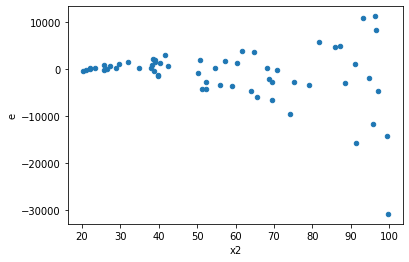

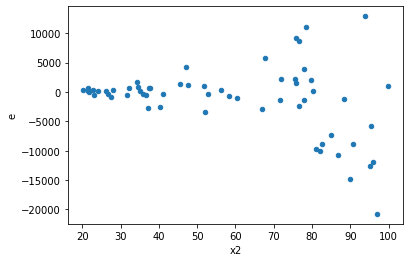

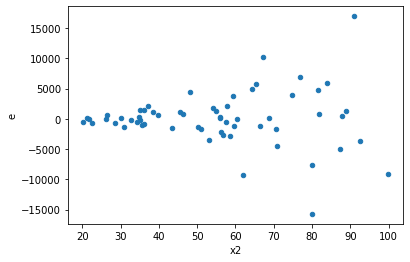

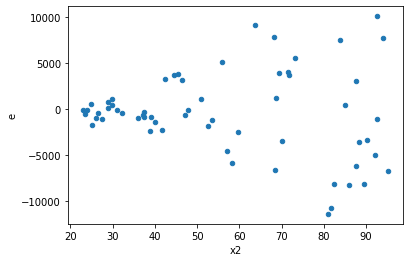

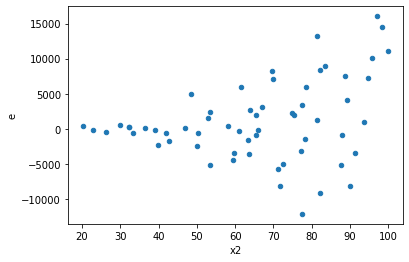

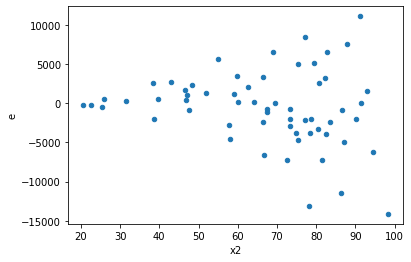

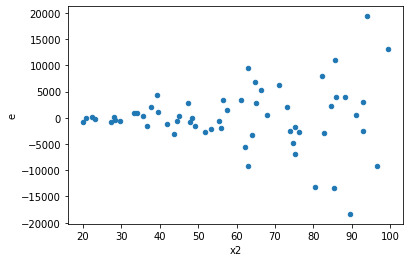

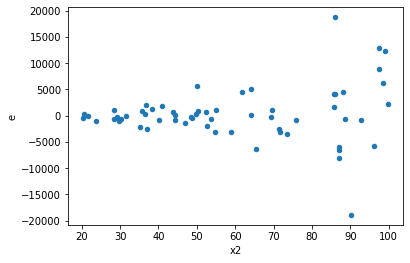

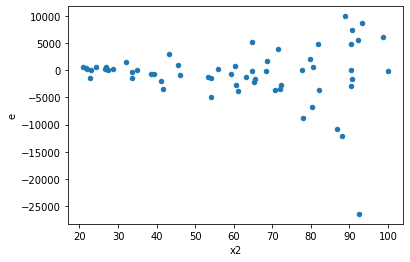

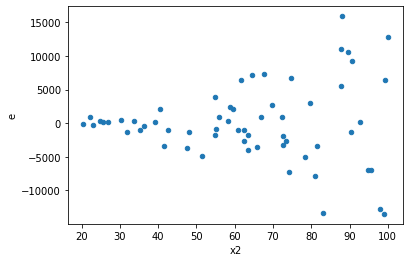

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,33.0,23.0,122919134.08612172,1316438839.1020112,3724822.2450339915,57236471.26530483,15.366228909745601,3.490182809429143e-09,0.9999999982549086,1.7450914047145716e-09,Reject005=0 : Heteroscedasticity
6.0,28.0,28.0,223214396.17111105,497550315.75575596,7971942.720396823,17769654.13413414,2.229024311560735,0.037988711686244736,0.9810056441568776,0.018994355843122368,Reject005=0 : Heteroscedasticity
8.0,20.0,36.0,82048498.85773656,1346578360.3288815,4102424.942886828,37404954.453580044,9.117766924276406,1.6525190105198817e-08,0.999999991737405,8.262595052599409e-09,Reject005=0 : Heteroscedasticity
14.0,22.0,34.0,142174266.37228933,1437034617.4193358,6462466.653285879,42265724.04174517,6.540184469695471,1.4076491359205079e-06,0.999999296175432,7.038245679602539e-07,Reject005=0 : Heteroscedasticity
17.0,33.0,23.0,151183576.2405785,1323430741.9668567,4581320.4921387425,57540467.04203725,12.559799547046111,2.7710823191640088e-08,0.9999999861445884,1.3855411595820044e-08,Reject005=0 : Heteroscedasticity
21.0,20.0,36.0,110496919.09076513,697651196.0249387,5524845.954538257,19379199.889581632,3.5076452898497625,0.00103394558970904,0.9994830272051455,0.00051697279485452,Reject005=0 : Heteroscedasticity
22.0,26.0,30.0,166552203.4367142,1562269414.6708307,6405853.978335162,52075647.15569436,8.129384049623383,2.061979564871308e-07,0.9999998969010218,1.030989782435654e-07,Reject005=0 : Heteroscedasticity
26.0,33.0,23.0,341705880.43768865,340954341.47759974,10354723.64962693,14824101.803373901,1.4316269854201276,0.373116795585686,0.813441602207157,0.186558397792843,Reject005=1 : Homoscedasticity
29.0,29.0,27.0,747741281.2171558,969686922.9034107,25784182.110936407,35914330.477904096,1.3928822843161262,0.3896687414361095,0.8051656292819452,0.19483437071805476,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,33.0,1007396494.2728118,215560812.44954196,43799847.577078775,6532145.831804302,0.14913626857511458,1.1993712149406679e-05,Reject005=0 : Heteroscedasticity
1.0,33.0,23.0,122919134.08612172,1316438839.1020112,3724822.2450339915,57236471.26530483,15.366228909745601,3.490182809429143e-09,Reject005=0 : Heteroscedasticity
2.0,29.0,27.0,1440310484.3909876,48293272.90581752,49665878.77210302,1788639.7372525008,0.03601345192058028,4.650090493741345e-14,Reject005=0 : Heteroscedasticity
3.0,26.0,30.0,722934778.5967746,405685033.29887843,27805183.792183638,13522834.443295948,0.48634220670382244,0.06556755663133997,Reject005=1 : Homoscedasticity
4.0,35.0,21.0,1040834122.9346992,44894360.014173076,29738117.798134264,2137826.667341575,0.07188843227582144,4.811007832568202e-11,Reject005=0 : Heteroscedasticity
5.0,34.0,22.0,2193087926.5246196,108255043.99365269,64502586.074253514,4920683.817893304,0.07628661294647558,1.4622430646173271e-10,Reject005=0 : Heteroscedasticity
6.0,28.0,28.0,223214396.17111105,497550315.75575596,7971942.720396823,17769654.13413414,2.229024311560735,0.037988711686244736,Reject005=0 : Heteroscedasticity
7.0,34.0,22.0,1795028161.4417784,165805380.5136056,52794945.92475819,7536608.2051638905,0.14275245618974294,6.123710716927776e-07,Reject005=0 : Heteroscedasticity
8.0,20.0,36.0,82048498.85773656,1346578360.3288815,4102424.942886828,37404954.453580044,9.117766924276406,1.6525190105198817e-08,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    755
Reject005=1 : Homoscedasticity      245
Name: Result_test, dtype: int64